In [1]:
import h5py
import numpy as np
import pandas as pd
import scipy
from scipy import signal
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

2023-02-26 11:50:32.581716: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def getData(cfileName):

    # Read the *.cfile which has each element in float32 format.
    data = np.fromfile(cfileName, dtype="float32")

    # Take each consecutive interleaved I sample and Q sample to create a single complex element.
    data = data[0::2] + 1j*data[1::2]
    #print("data type=", type(data))
    # Return the complex numpy array.
    return data


def create_dataset(data, class_label):
    f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
    print(len(f))
    print(len(t))
    print(Zxx.shape)

    del data

    Zxx = Zxx.transpose()

    Zxx = abs(Zxx)
    # scaling the features (only real part of the data can be used)
    scaler = MinMaxScaler()
    scaler.fit(Zxx)
    print(scaler.data_max_)
    Zxx = scaler.transform(Zxx)

    X = Zxx[:num_samp_per_class]
    Y = np.full(num_samp_per_class, class_label)

    return X, Y


# number of samples per class
num_samp_per_class = 10000

# FFT size for the STFT operation (which is same as the feature vector size)
fft_size = feature_vector_size = 2048 #1024

# number of overlapping samples for the STFT operation
fft_overlap = 256

## iPhone13_I_data1 dataset

In [3]:
class_label = 10
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals_iPhone13_I_Validate/iPhone13_I_data2/"
    if(i==0):
        data = getData(folder_path + "calendar_app.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "camera_photo.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "camera_video.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "email_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "gallery_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "home_screen.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "idle.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "phone_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==8):
            data = getData(folder_path + "sms_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==9):
            data = getData(folder_path + "web_browser_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(i)
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_I_BeSh.csv', header=False)

[0.0078125+0.0234375j 0.       +0.j        0.0234375+0.j        ...
 0.       +0.0078125j 0.015625 +0.j        0.0234375+0.j       ]
2048
82435
(2048, 82435)
[0.01839778 0.00970962 0.00328338 ... 0.00214767 0.00365468 0.0095812 ]
0
(10000, 2048)
(10000,)
[0.0078125+0.j        0.       +0.015625j  0.0234375+0.0078125j ...
 0.015625 +0.j        0.0234375+0.0078125j 0.0234375+0.0078125j]
2048
86095
(2048, 86095)
[0.01843173 0.00946957 0.00374642 ... 0.00186381 0.00396029 0.00955348]
1
(20000, 2048)
(20000,)
[0.03125  +0.015625j  0.015625 +0.j        0.015625 +0.015625j  ...
 0.015625 +0.0078125j 0.0078125+0.0078125j 0.0234375+0.015625j ]
2048
73940
(2048, 73940)
[0.01829132 0.00990963 0.00342399 ... 0.00169991 0.00337759 0.00956888]
2
(30000, 2048)
(30000,)
[0.015625 +0.015625j  0.015625 +0.j        0.0078125-0.0078125j ...
 0.0234375+0.0078125j 0.0078125+0.015625j  0.015625 -0.0078125j]
2048
86822
(2048, 86822)
[0.01869311 0.00973575 0.00366161 ... 0.001999   0.00377608 0.00975098]
3
(40

## Cross-model Validation

## iPhone13_I model

Cross-model Validation without training

In [4]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I_model.h5")
model.summary()

2023-02-26 11:58:42.845913: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_19 (Dense)            (None, 800)               1120800   
                                                                 
 dense_20 (Dense)            (None, 500)               400500    
                                                                 
 dense_21 (Dense)            (None, 200)               100200    
                                                                 
 dense_22 (Dense)            (None, 100)               20100     
                                                                 
 dense_23 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [5]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 14s 4ms/step - loss: 8.5059 - accuracy: 0.1260
test loss, test acc: [8.505852699279785, 0.12602999806404114]


In [6]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 12s 4ms/step
[[   1 8001 1380    0    1  601   15    0    1    0]
 [   1 1715  109    1    9 8067    1    0   97    0]
 [   1   14    3   73    0 9843    2    0   64    0]
 [   1 3044  745   23   12 6166    1    0    8    0]
 [   1 5721    1    0  136 2718    3    0 1420    0]
 [   1 3249 6011    0    1  723   15    0    0    0]
 [   1    0    0    0    0 7743    0  129 2127    0]
 [   0    0    0    0    0    0    0 9994    6    0]
 [   2  666 1004   66    0 8253    1    0    8    0]
 [   1    8  411 5578    0 3995    2    0    5    0]]
              precision    recall  f1-score   support

           0       0.10      0.00      0.00     10000
           1       0.08      0.17      0.11     10000
           2       0.00      0.00      0.00     10000
           3       0.00      0.00      0.00     10000
           4       0.86      0.01      0.03     10000
           5       0.02      0.07      0.02     10000
           6       0.00      0.0

Test Accuracy:0.12603


Text(0.5, 1.0, 'Accuracy:0.126')

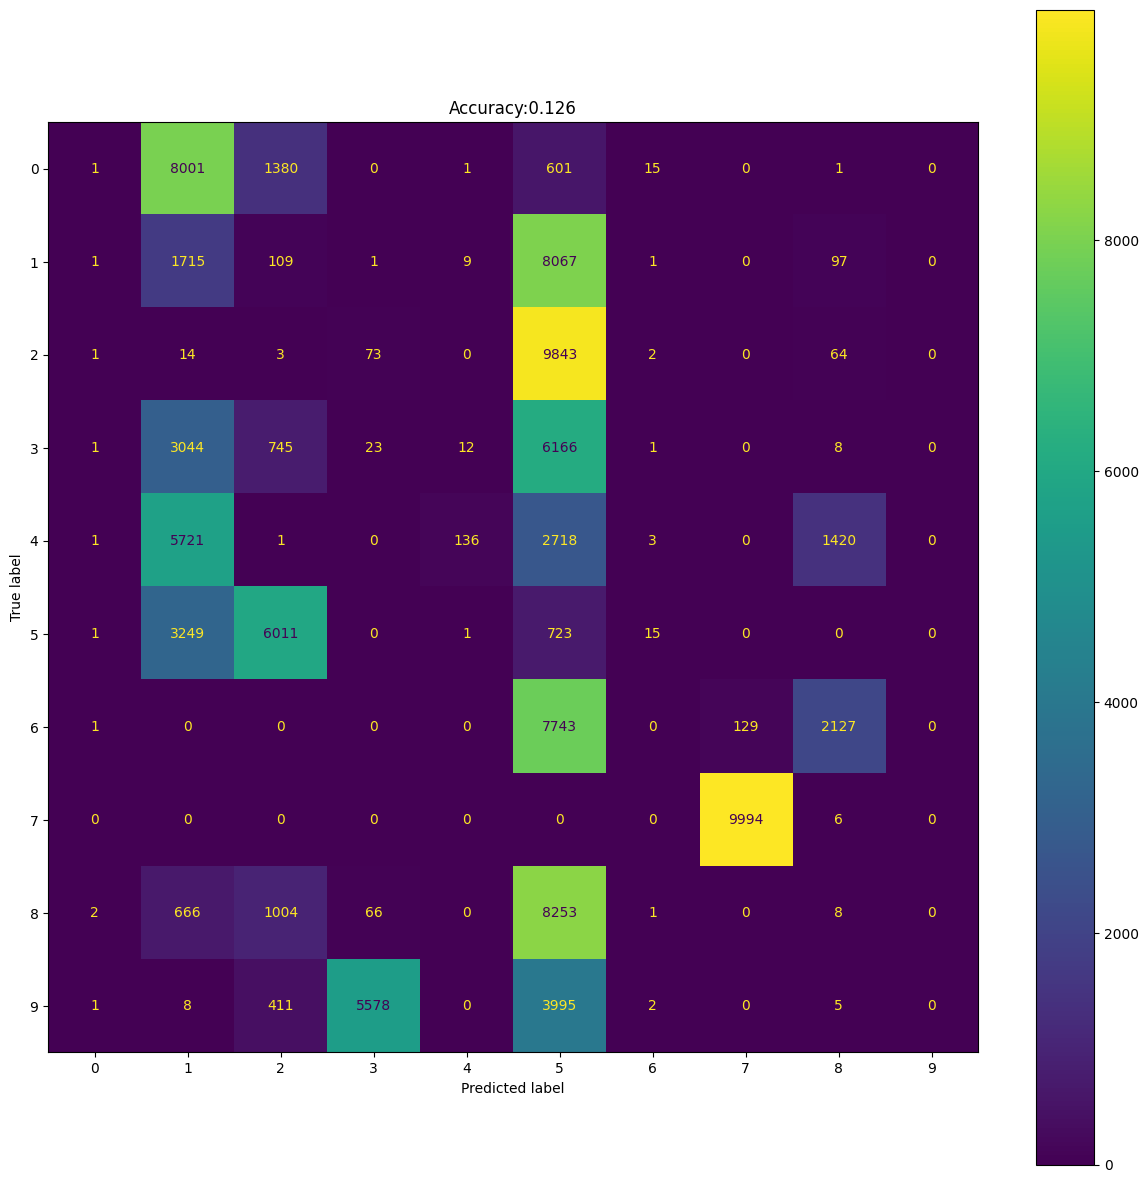

In [7]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [8]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_19 (Dense)            (None, 800)               1120800   
                                                                 
 dense_20 (Dense)            (None, 500)               400500    
                                                                 
 dense_21 (Dense)            (None, 200)               100200    
                                                                 
 dense_22 (Dense)            (None, 100)               20100     
                                                                 
 dense_23 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [11]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 16s 5ms/step - loss: 0.5002 - accuracy: 0.8201
Epoch 2/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.4977 - accuracy: 0.8214
Epoch 3/30
3125/3125 [==============================] - 12s 4ms/step - loss: 0.4956 - accuracy: 0.8222
Epoch 4/30
3125/3125 [==============================] - 14s 5ms/step - loss: 0.4934 - accuracy: 0.8228
Epoch 5/30
3125/3125 [==============================] - 14s 5ms/step - loss: 0.4913 - accuracy: 0.8234
Epoch 6/30
3125/3125 [==============================] - 17s 5ms/step - loss: 0.4895 - accuracy: 0.8242
Epoch 7/30
3125/3125 [==============================] - 16s 5ms/step - loss: 0.4875 - accuracy: 0.8251
Epoch 8/30
3125/3125 [==============================] - 24s 8ms/step - loss: 0.4857 - accuracy: 0.8257
Epoch 9/30
3125/3125 [==============================] - 18s 6ms/step - loss: 0.4838 - accuracy: 0.8264
Epoch 10/30
3125/3125 [==============================] - 14s 5ms/step - l

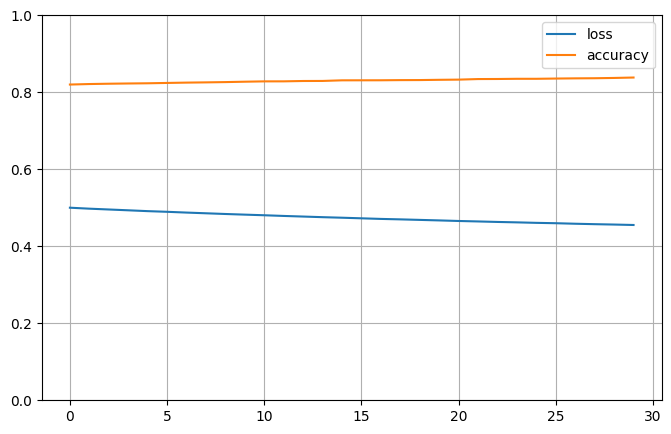

In [12]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [13]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 16s 5ms/step - loss: 0.4538 - accuracy: 0.8382
test loss, test acc: [0.45381760597229004, 0.8381699919700623]


In [14]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 18s 6ms/step
[[8446   28    0   55  230 1076    0    0  165    0]
 [  96 6218  293  506  961   70    5    0 1823   28]
 [   6  182 8670  191   10    3  100    1  178  659]
 [  50  305  168 8150   97   82    0    0 1046  102]
 [ 277 1245    8   46 8325   15    3    0   81    0]
 [1254   25    0   55   41 8362    0    0  263    0]
 [   1    1   86    1    0    2 9906    3    0    0]
 [   0    0    0    0    2    0    1 9997    0    0]
 [  77 1264  263 1036   79  139    0    0 6720  422]
 [   8    8  575   70    4    2    0    0  310 9023]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.84     10000
           1       0.67      0.62      0.65     10000
           2       0.86      0.87      0.86     10000
           3       0.81      0.81      0.81     10000
           4       0.85      0.83      0.84     10000
           5       0.86      0.84      0.85     10000
           6       0.99      0.9

Test Accuracy:0.83817


Text(0.5, 1.0, 'Accuracy:0.838')

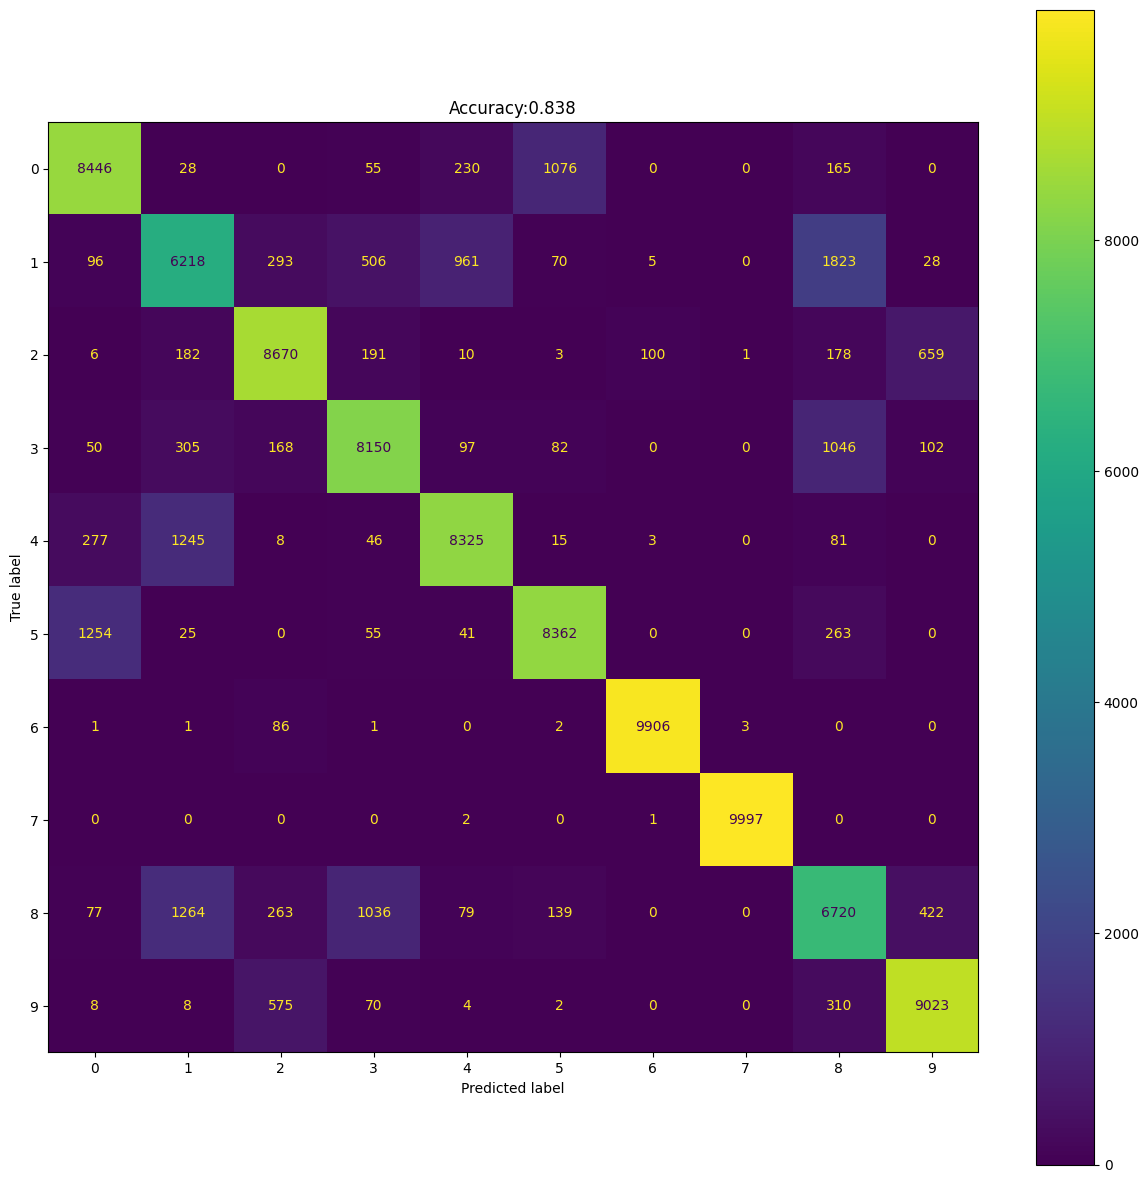

In [15]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_I(ii) model

Cross-model Validation without training

In [16]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I(ii)_model.h5")
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [17]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 18s 6ms/step - loss: 11.3865 - accuracy: 0.1066
test loss, test acc: [11.38654613494873, 0.10661999881267548]


In [18]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 15s 5ms/step
[[   0 3056    0    1 2808   49    0    0    0 4086]
 [   1   75    0    1 6173 3000  375  175    0  200]
 [   1   66    0    1  536 9048  170  137    1   40]
 [   0   27    0    0  910 7222   47    1    0 1793]
 [   0  179    1   15 9660   79    0   12    0   54]
 [   0   91    0    1 6861  795  111   45    0 2096]
 [   1  213  346    0   20  895    9 4972 3544    0]
 [2336    1    3    0    0    1    0    0 7659    0]
 [   0    5    0    2 2192 6544  730  204    0  323]
 [   0    5    1    2   20 9180  647   22    0  123]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10000
           1       0.02      0.01      0.01     10000
           2       0.00      0.00      0.00     10000
           3       0.00      0.00      0.00     10000
           4       0.33      0.97      0.49     10000
           5       0.02      0.08      0.03     10000
           6       0.00      0.0

Test Accuracy:0.10662


Text(0.5, 1.0, 'Accuracy:0.107')

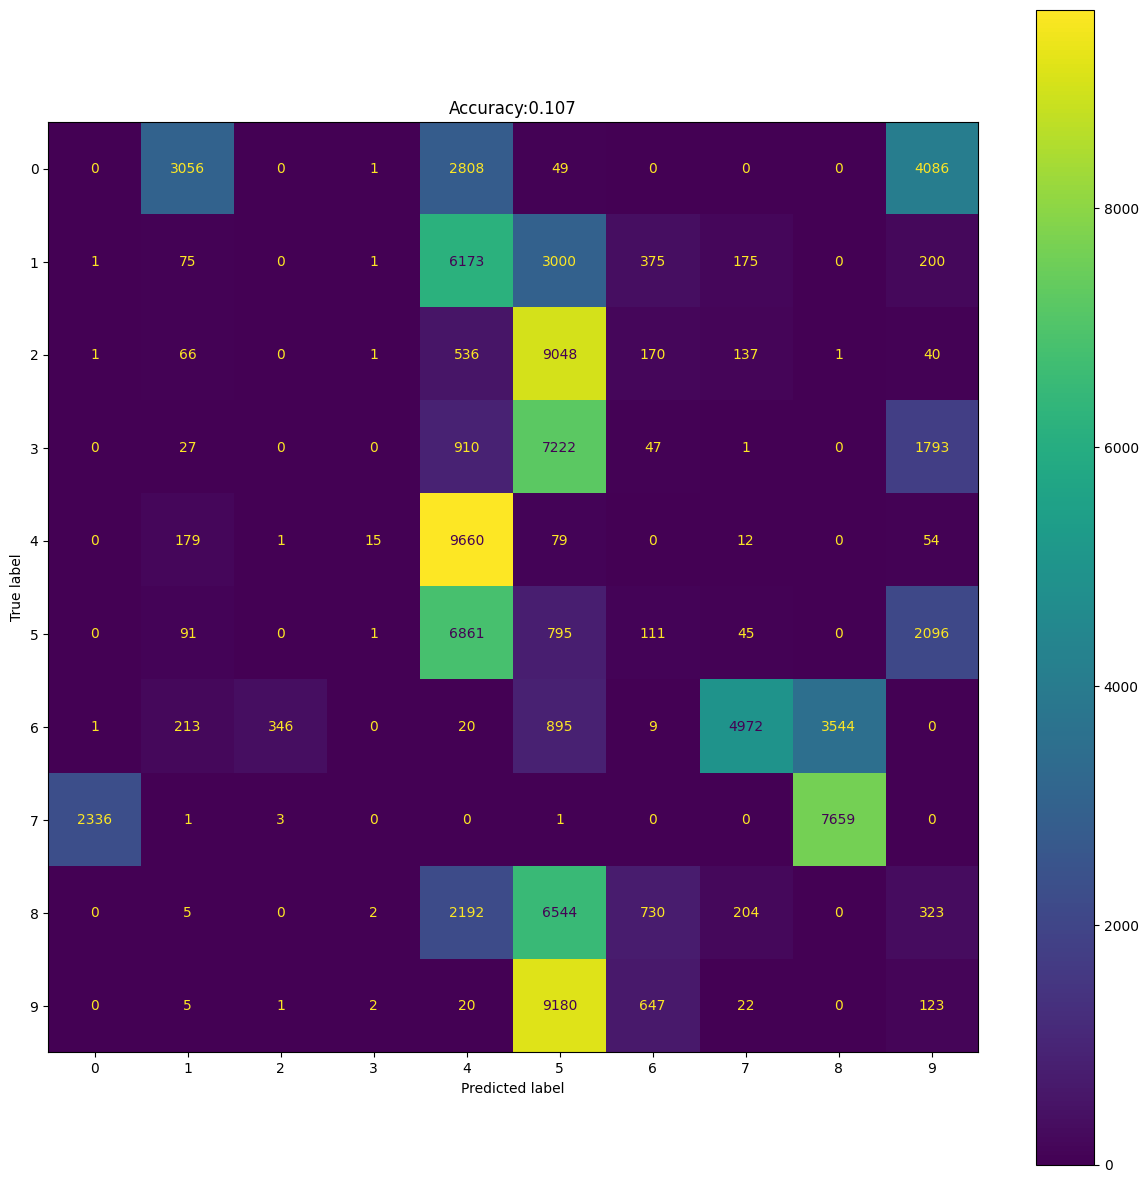

In [19]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [20]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [21]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 18s 6ms/step - loss: 1.8641 - accuracy: 0.4591
Epoch 2/30
3125/3125 [==============================] - 17s 5ms/step - loss: 0.8522 - accuracy: 0.7032
Epoch 3/30
3125/3125 [==============================] - 17s 6ms/step - loss: 0.7617 - accuracy: 0.7315
Epoch 4/30
3125/3125 [==============================] - 14s 5ms/step - loss: 0.7231 - accuracy: 0.7416
Epoch 5/30
3125/3125 [==============================] - 19s 6ms/step - loss: 0.7003 - accuracy: 0.7476
Epoch 6/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.6838 - accuracy: 0.7527
Epoch 7/30
3125/3125 [==============================] - 14s 4ms/step - loss: 0.6716 - accuracy: 0.7556
Epoch 8/30
3125/3125 [==============================] - 16s 5ms/step - loss: 0.6618 - accuracy: 0.7590
Epoch 9/30
3125/3125 [==============================] - 16s 5ms/step - loss: 0.6535 - accuracy: 0.7616
Epoch 10/30
3125/3125 [==============================] - 15s 5ms/step - l

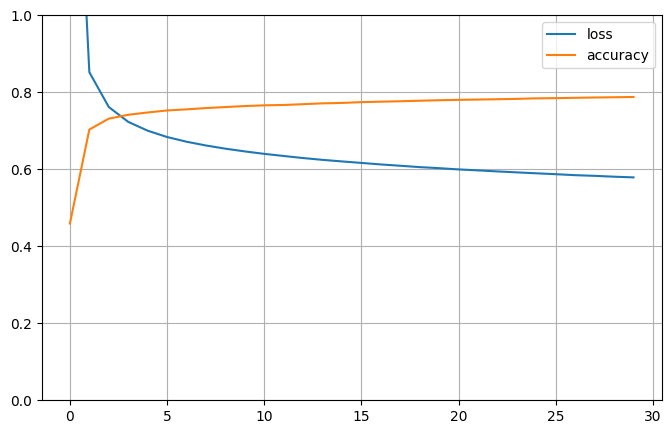

In [22]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [23]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 15s 5ms/step - loss: 0.5786 - accuracy: 0.7869
test loss, test acc: [0.5785952210426331, 0.7869099974632263]


In [24]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 13s 4ms/step
[[9339    4    0   28  285  344    0    0    0    0]
 [  41 4840  490  590  905  700   26    0 2357   51]
 [  10  181 7274  514   12    6   62    0  522 1419]
 [  73  320  628 7293   87  120    0    0 1060  419]
 [ 403  564    3   22 8464  503    2    0   39    0]
 [ 554  505    8  206  867 7339    0    0  521    0]
 [   7    0   62    1    0    2 9922    2    0    4]
 [   1    0    0    0    0    0    5 9994    0    0]
 [   6 1165  666 1218   85  379    7    0 6047  427]
 [   5    3 1241  289    2    2    4    0  275 8179]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     10000
           1       0.64      0.48      0.55     10000
           2       0.70      0.73      0.71     10000
           3       0.72      0.73      0.72     10000
           4       0.79      0.85      0.82     10000
           5       0.78      0.73      0.76     10000
           6       0.99      0.9

Test Accuracy:0.78691


Text(0.5, 1.0, 'Accuracy:0.787')

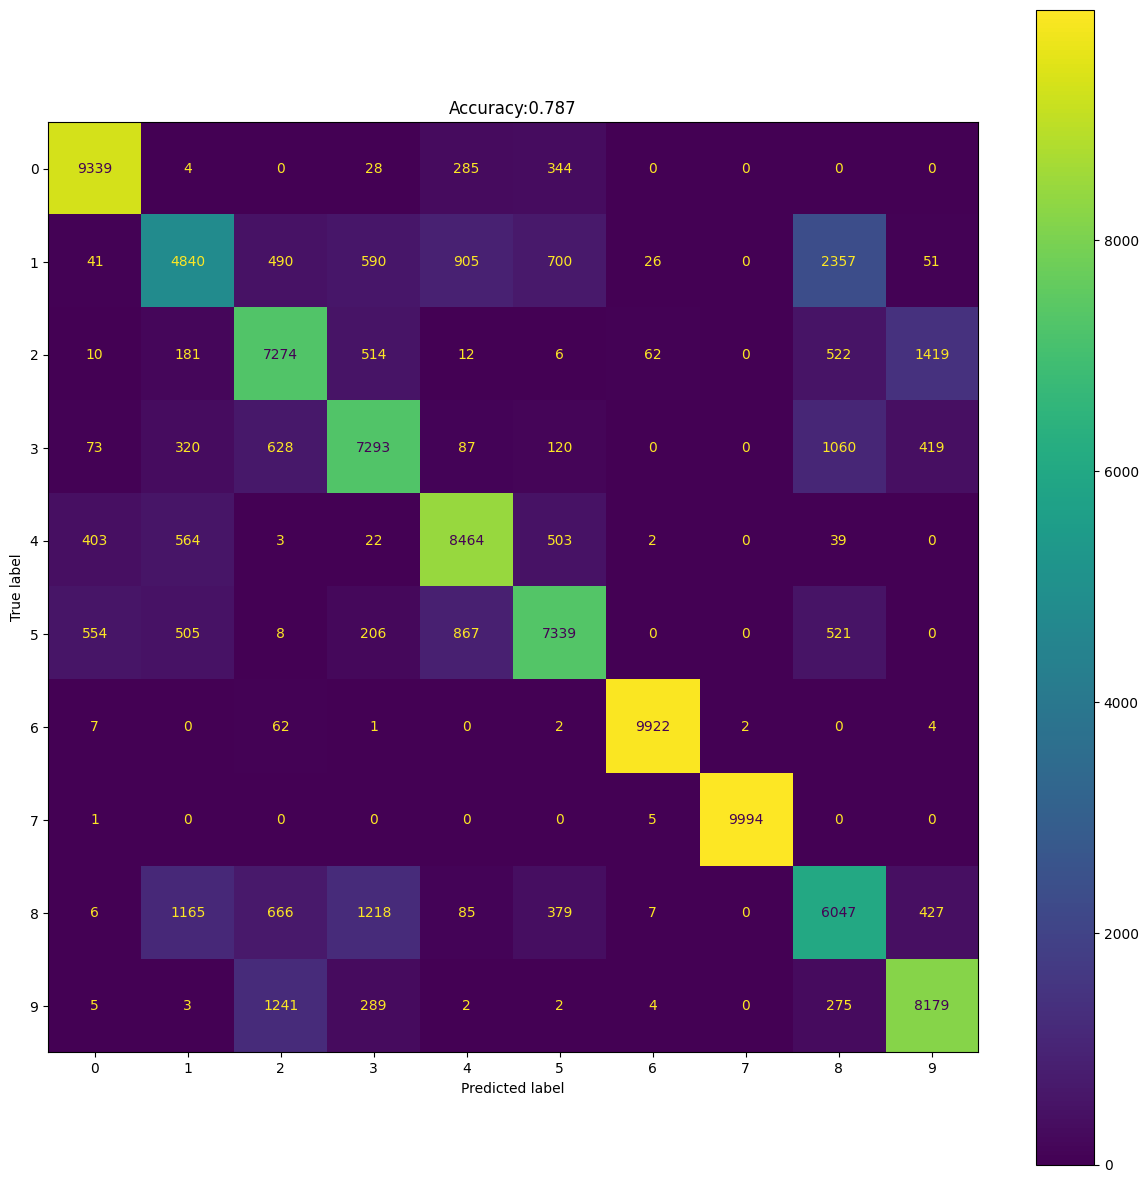

In [25]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_I(iii) model

Cross-model Validation without training

In [26]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I(iii)_model.h5")
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_13 (Dense)            (None, 800)               1120800   
                                                                 
 dense_14 (Dense)            (None, 500)               400500    
                                                                 
 dense_15 (Dense)            (None, 200)               100200    
                                                                 
 dense_16 (Dense)            (None, 100)               20100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [27]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 33s 10ms/step - loss: 9.0523 - accuracy: 0.1200
test loss, test acc: [9.0523099899292, 0.1200300008058548]


In [28]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 31s 10ms/step
[[  62   29  536 9372    0    0    1    0    0    0]
 [ 203  518  576 7271    0    0 1432    0    0    0]
 [4885   50    3 3049    0  216 1718   79    0    0]
 [ 598    0    4 9220    0    1    7  168    0    2]
 [   8  962 5225 3770    0    0   34    0    0    1]
 [  10   62  938 8978    0    0   12    0    0    0]
 [ 935 5950  172   40  245  459 2199    0    0    0]
 [   2   74    1    0 8900  789  233    0    0    1]
 [1034  107  341 7645    0    0  871    2    0    0]
 [8671   18    3  589    0  248  425   45    0    1]]
              precision    recall  f1-score   support

           0       0.00      0.01      0.00     10000
           1       0.07      0.05      0.06     10000
           2       0.00      0.00      0.00     10000
           3       0.18      0.92      0.31     10000
           4       0.00      0.00      0.00     10000
           5       0.00      0.00      0.00     10000
           6       0.32      0.

Test Accuracy:0.12003


Text(0.5, 1.0, 'Accuracy:0.120')

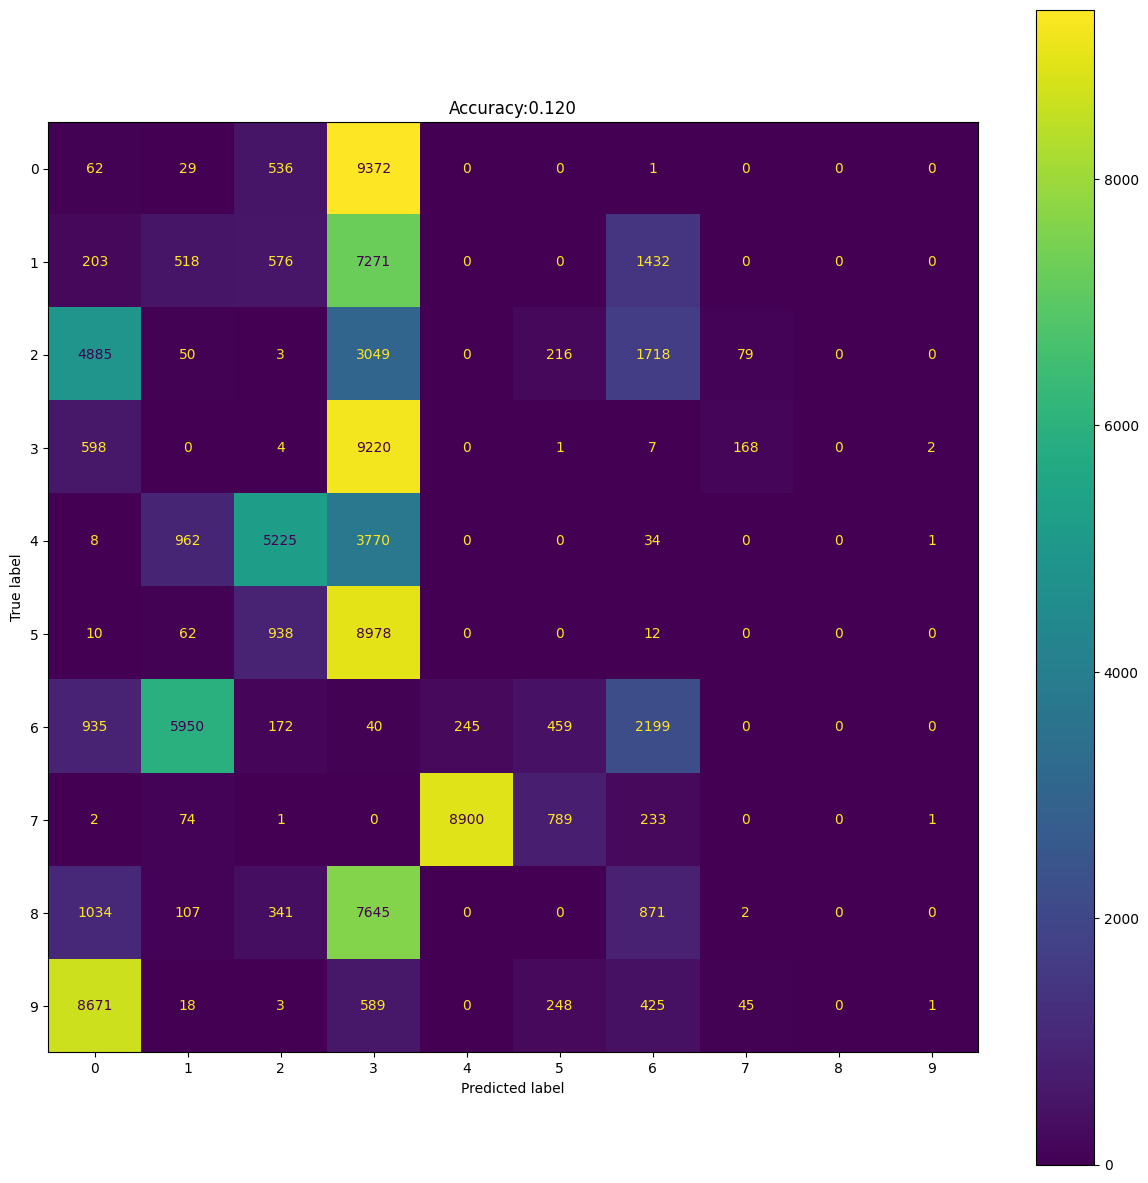

In [29]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [30]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_13 (Dense)            (None, 800)               1120800   
                                                                 
 dense_14 (Dense)            (None, 500)               400500    
                                                                 
 dense_15 (Dense)            (None, 200)               100200    
                                                                 
 dense_16 (Dense)            (None, 100)               20100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [31]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 28s 9ms/step - loss: 2.1235 - accuracy: 0.3666
Epoch 2/30
3125/3125 [==============================] - 14s 5ms/step - loss: 1.0750 - accuracy: 0.5835
Epoch 3/30
3125/3125 [==============================] - 16s 5ms/step - loss: 0.9587 - accuracy: 0.6292
Epoch 4/30
3125/3125 [==============================] - 14s 4ms/step - loss: 0.9012 - accuracy: 0.6523
Epoch 5/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.8656 - accuracy: 0.6670
Epoch 6/30
3125/3125 [==============================] - 20s 6ms/step - loss: 0.8413 - accuracy: 0.6772
Epoch 7/30
3125/3125 [==============================] - 16s 5ms/step - loss: 0.8231 - accuracy: 0.6844
Epoch 8/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.8089 - accuracy: 0.6905
Epoch 9/30
3125/3125 [==============================] - 14s 5ms/step - loss: 0.7975 - accuracy: 0.6945
Epoch 10/30
3125/3125 [==============================] - 15s 5ms/step - l

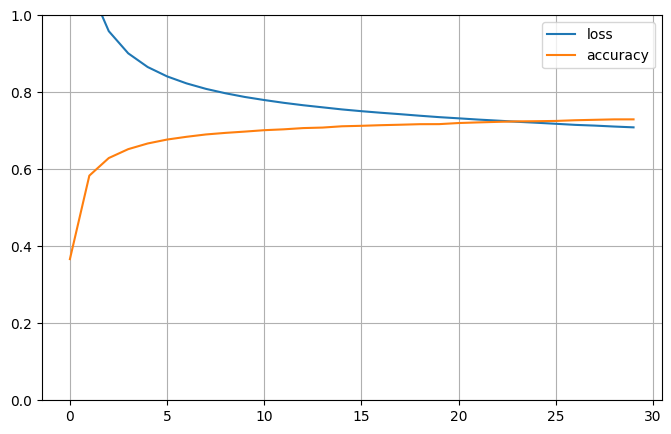

In [32]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [33]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 14s 4ms/step - loss: 0.7063 - accuracy: 0.7318
test loss, test acc: [0.7062673568725586, 0.7318000197410583]


In [34]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 15s 5ms/step
[[7032  283   41  157  606 1551    2    0  323    5]
 [ 426 5589  284   40  806  804  137    0 1895   19]
 [  39  139 5729  460    2    2  243    0 1129 2257]
 [ 111   21  325 8799    0  103    0    0  480  161]
 [ 617  700    2    3 7541 1028   27    0   82    0]
 [2063  670   10  131 1284 5543    3    0  294    2]
 [   2   70  100    1   29    0 9460  136   87  115]
 [   1    0    0    1    1    0  133 9861    0    3]
 [ 501 1645  702  423  175  379  132    0 5804  239]
 [  19   12 1411  199    3    0  143    0  391 7822]]
              precision    recall  f1-score   support

           0       0.65      0.70      0.68     10000
           1       0.61      0.56      0.58     10000
           2       0.67      0.57      0.62     10000
           3       0.86      0.88      0.87     10000
           4       0.72      0.75      0.74     10000
           5       0.59      0.55      0.57     10000
           6       0.92      0.9

Test Accuracy:0.7318


Text(0.5, 1.0, 'Accuracy:0.732')

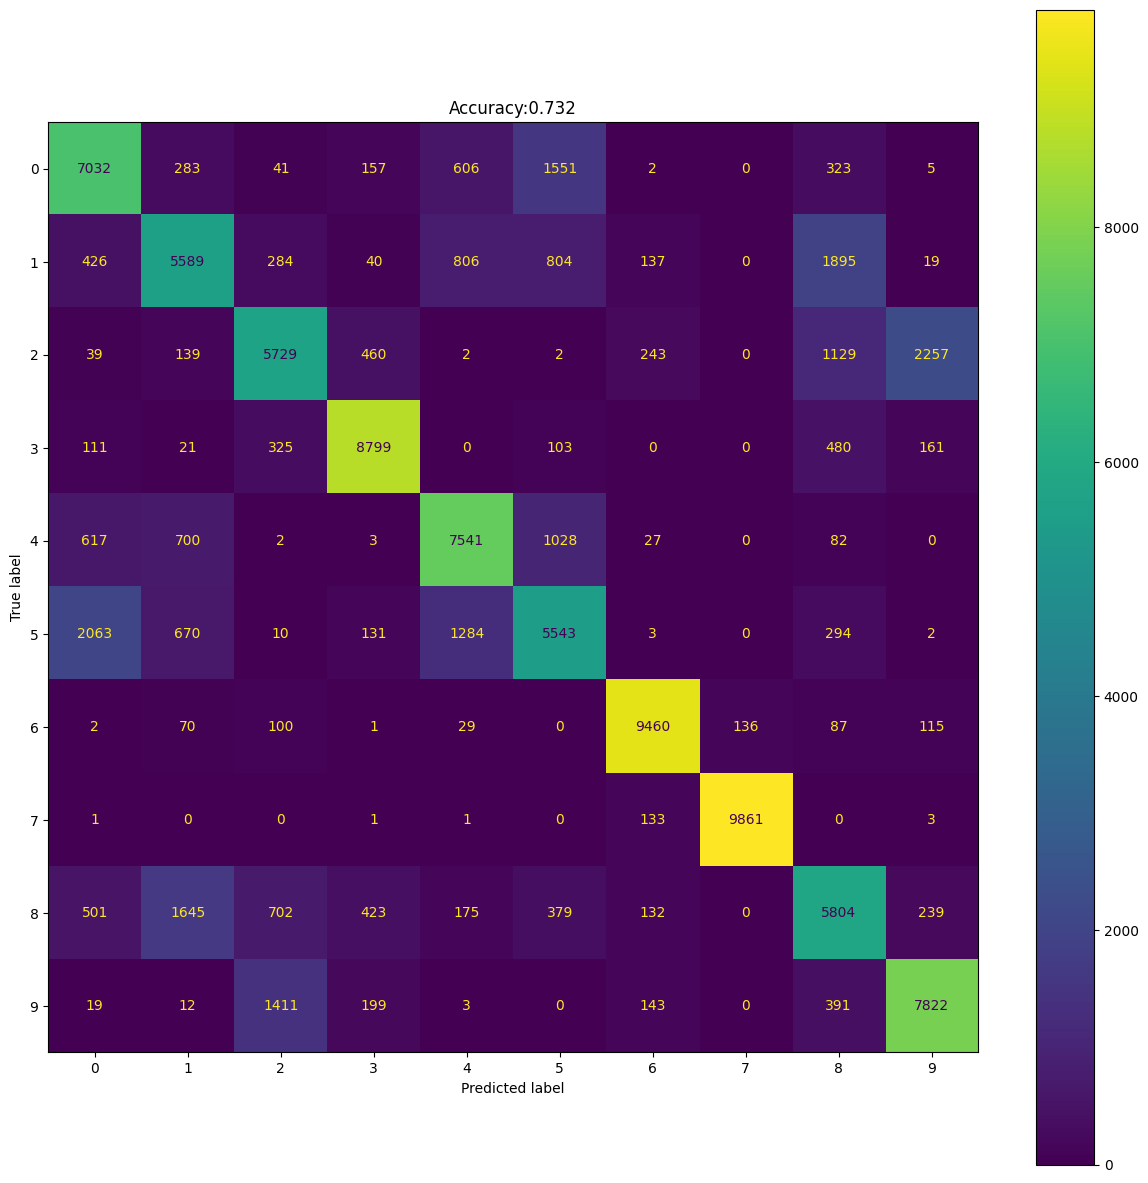

In [35]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_I_BeSh model

Cross-model Validation without training

In [36]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I_BeSh_model.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
Non-

In [37]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 15s 5ms/step - loss: 15.4854 - accuracy: 0.0857
test loss, test acc: [15.485357284545898, 0.08568000048398972]


In [38]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 14s 5ms/step
[[   0 8402    0    0 1133    0    1   16    2  446]
 [   0   14    0    0  362    0    1 5233    1 4389]
 [   0    3  159    0    0    1    1 8425    0 1411]
 [   0   20    0    0    9    1    0  460    0 9510]
 [   0   45    0    0  120    1    1 2312    1 7520]
 [   0 8705    0    0 1064    1    1    2    0  227]
 [   0    0 6918    0    1    1    0 3078    1    1]
 [   0    1 9984    1    1    0    0   12    0    1]
 [   0   90    0    0  619    2    1 1609    0 7679]
 [   0    3   27    0    2    1    0 1704    1 8262]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10000
           1       0.00      0.00      0.00     10000
           2       0.01      0.02      0.01     10000
           3       0.00      0.00      0.00     10000
           4       0.04      0.01      0.02     10000
           5       0.12      0.00      0.00     10000
           6       0.00      0.0

Test Accuracy:0.08568


Text(0.5, 1.0, 'Accuracy:0.086')

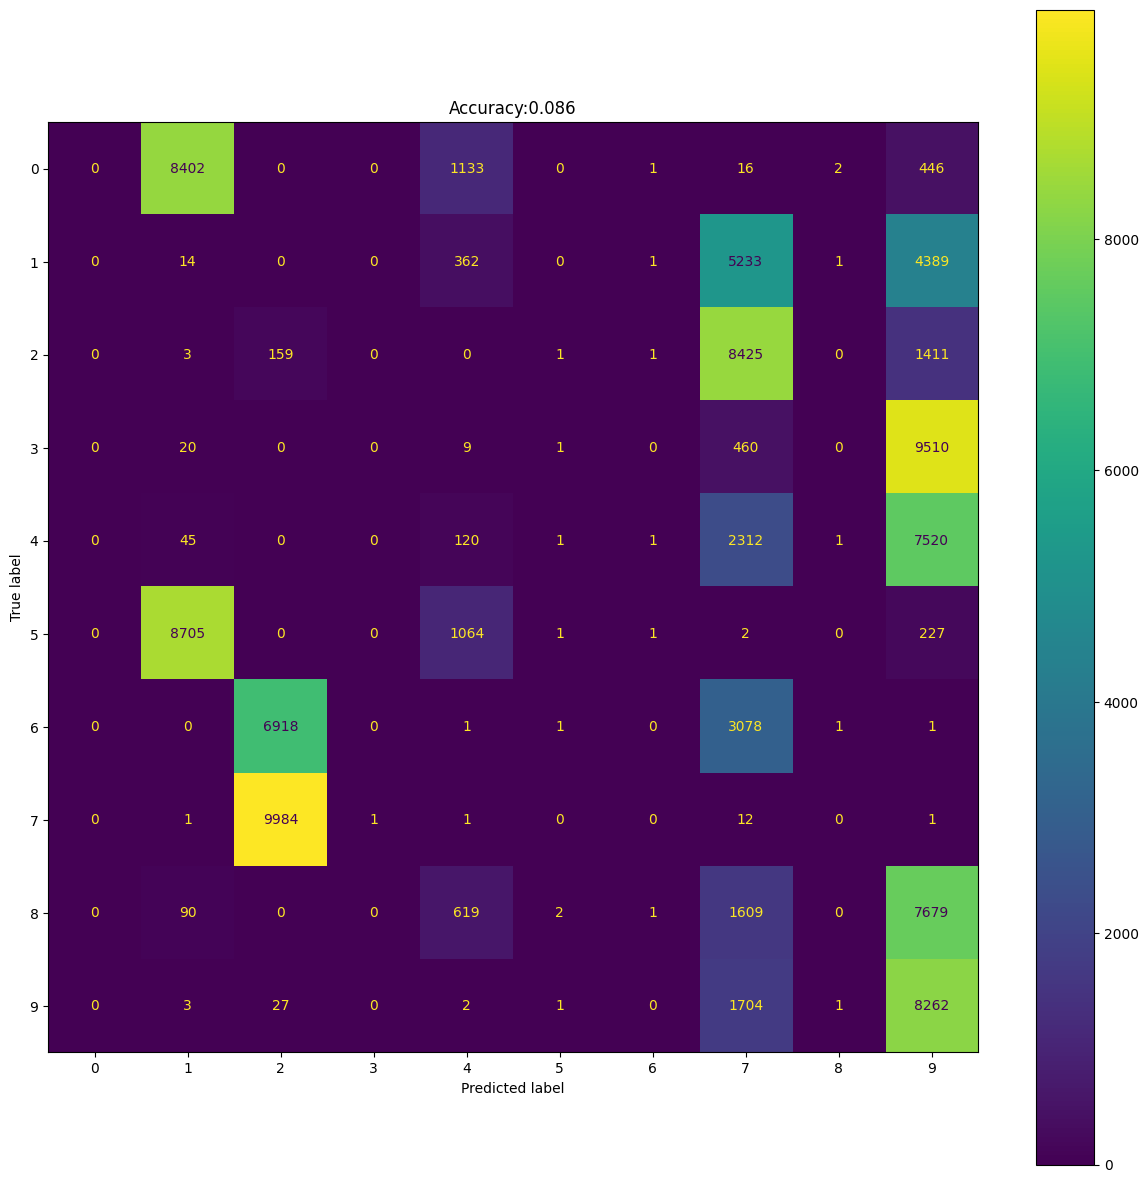

In [39]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [40]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-trai

In [42]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 20s 6ms/step - loss: 0.7026 - accuracy: 0.7394
Epoch 2/30
3125/3125 [==============================] - 14s 5ms/step - loss: 0.7002 - accuracy: 0.7388
Epoch 3/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.6967 - accuracy: 0.7424
Epoch 4/30
3125/3125 [==============================] - 16s 5ms/step - loss: 0.6940 - accuracy: 0.7409
Epoch 5/30
3125/3125 [==============================] - 21s 7ms/step - loss: 0.6913 - accuracy: 0.7426
Epoch 6/30
3125/3125 [==============================] - 20s 6ms/step - loss: 0.6884 - accuracy: 0.7435
Epoch 7/30
3125/3125 [==============================] - 16s 5ms/step - loss: 0.6859 - accuracy: 0.7452
Epoch 8/30
3125/3125 [==============================] - 18s 6ms/step - loss: 0.6834 - accuracy: 0.7467
Epoch 9/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.6809 - accuracy: 0.7481
Epoch 10/30
3125/3125 [==============================] - 15s 5ms/step - l

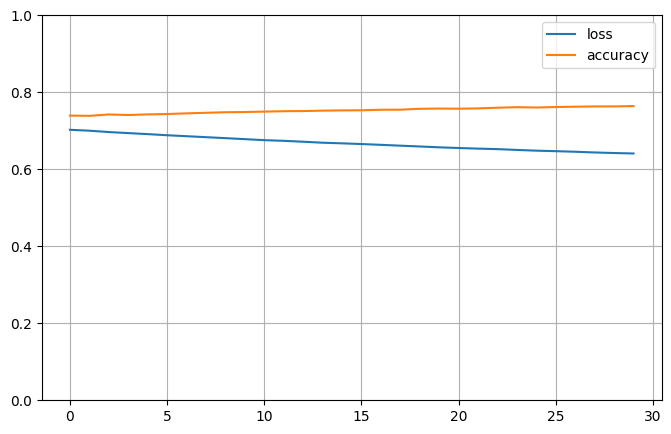

In [43]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [44]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 14s 4ms/step - loss: 0.6356 - accuracy: 0.7675
test loss, test acc: [0.6355698108673096, 0.767490029335022]


In [45]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 17s 5ms/step
[[7372   19    0   19  136 2308    0    0  146    0]
 [  57 4148  680  415 1474   12    0    0 2794  420]
 [   2  312 7797   80   24    4  107    0   74 1600]
 [  43  187  167 6904  538    4    0    0  817 1340]
 [ 133  448   98  787 7699   14    0    0  701  120]
 [1277    2    0    3   31 8567    0    0  120    0]
 [   2    0  105    1    0    1 9889    2    0    0]
 [   1    0    0    0    0    0   11 9986    1    1]
 [ 139  934  110  833  924  139    0    0 6400  521]
 [  11   73  751  791   22    2    2    0  361 7987]]
              precision    recall  f1-score   support

           0       0.82      0.74      0.77     10000
           1       0.68      0.41      0.51     10000
           2       0.80      0.78      0.79     10000
           3       0.70      0.69      0.70     10000
           4       0.71      0.77      0.74     10000
           5       0.78      0.86      0.81     10000
           6       0.99      0.9

Test Accuracy:0.76749


Text(0.5, 1.0, 'Accuracy:0.767')

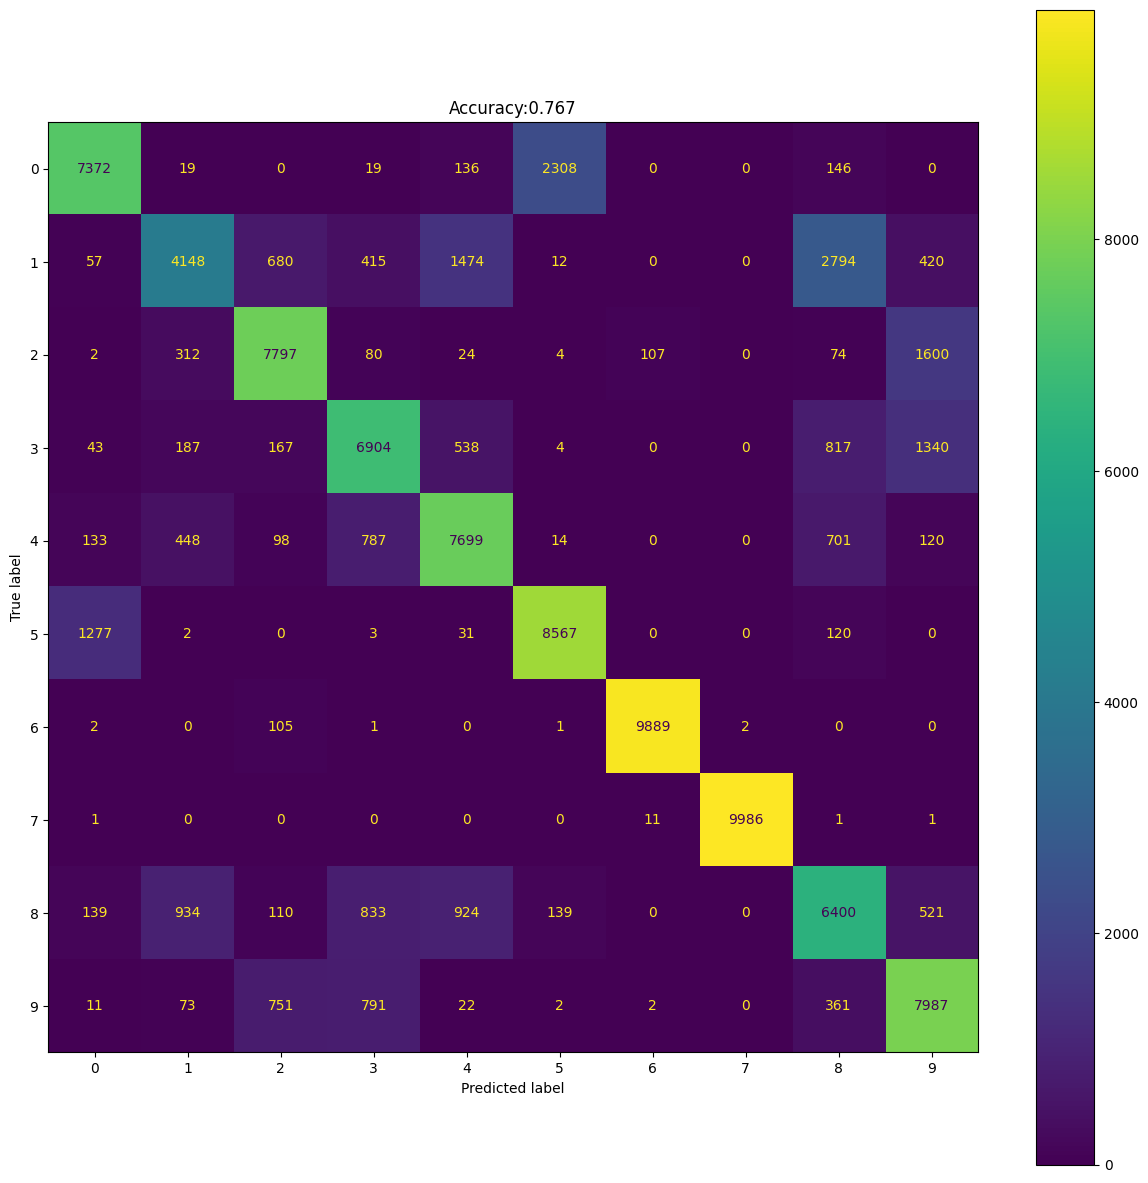

In [46]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_I_data1 model

Cross-model Validation without training

In [47]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I_data1_model.h5")
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_25 (Dense)            (None, 800)               1120800   
                                                                 
 dense_26 (Dense)            (None, 500)               400500    
                                                                 
 dense_27 (Dense)            (None, 200)               100200    
                                                                 
 dense_28 (Dense)            (None, 100)               20100     
                                                                 
 dense_29 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [48]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 16s 5ms/step - loss: 8.5518 - accuracy: 0.1439
test loss, test acc: [8.551822662353516, 0.1438799947500229]


In [49]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 15s 5ms/step
[[1475  621    0   61    0 7758   64   21    0    0]
 [   6 7719  171  468    6  163 1419   47    0    1]
 [   1 2778    5   24  312   51  447 4731 1629   22]
 [   3   15    0    0    0 4880  443  468    0 4191]
 [ 595 7823   90  601    0  128  762    0    0    1]
 [7055   66    0  190    0 2541  148    0    0    0]
 [   1    4    0   11 9981    0    0    2    0    1]
 [   0    0    0    1 9997    0    1    0    0    1]
 [   4 3760    2   69    5  835 4708  545   24   48]
 [   1   39    0   21    0 3706   50 2312 1247 2624]]
              precision    recall  f1-score   support

           0       0.16      0.15      0.15     10000
           1       0.34      0.77      0.47     10000
           2       0.02      0.00      0.00     10000
           3       0.00      0.00      0.00     10000
           4       0.00      0.00      0.00     10000
           5       0.13      0.25      0.17     10000
           6       0.00      0.0

Test Accuracy:0.14388


Text(0.5, 1.0, 'Accuracy:0.144')

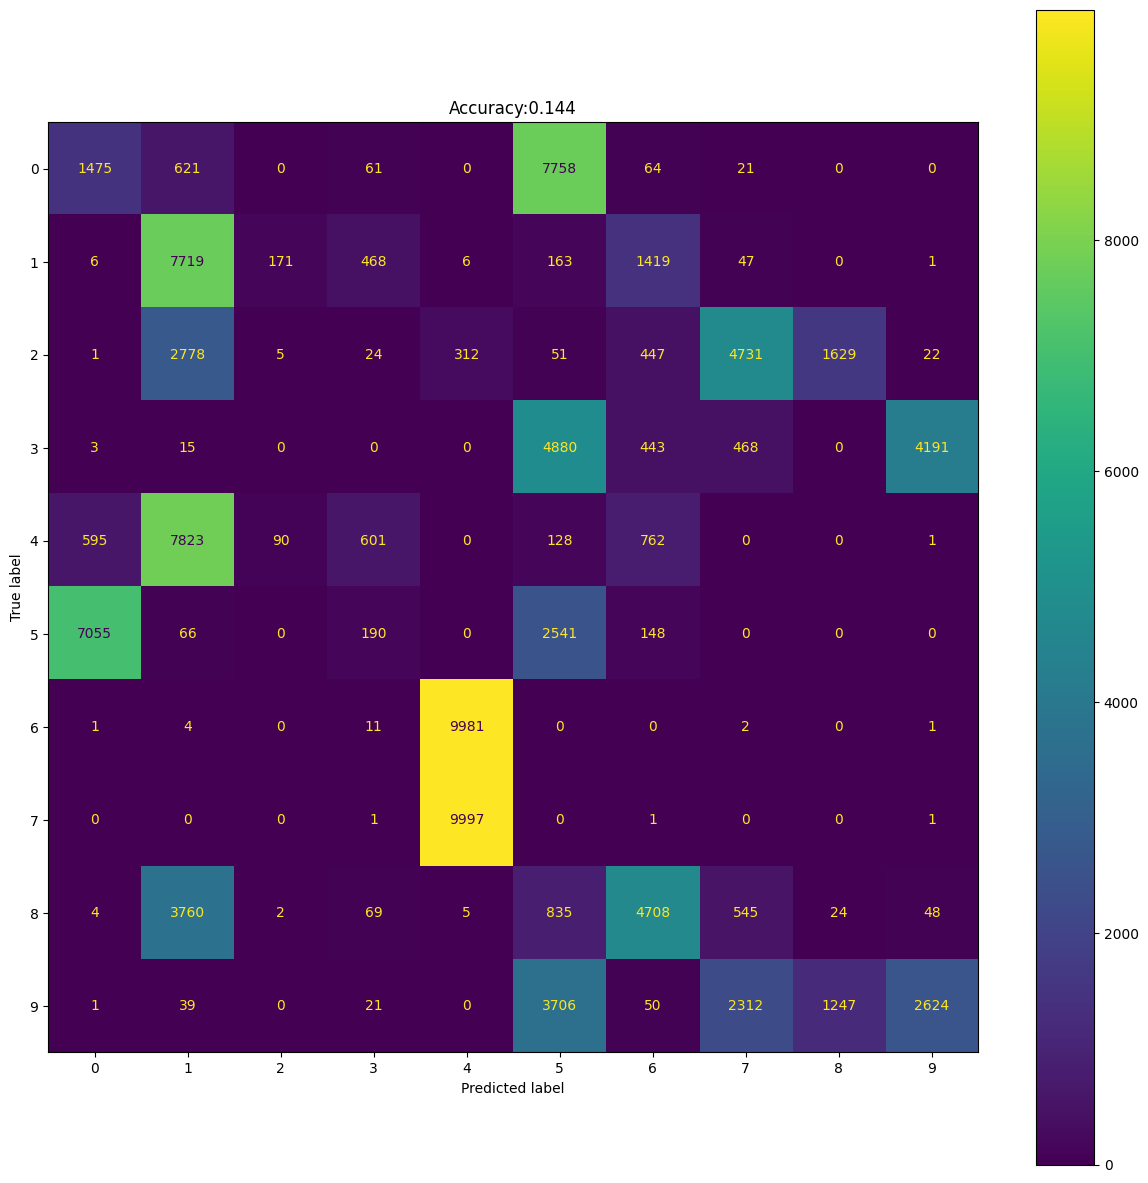

In [50]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [51]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_25 (Dense)            (None, 800)               1120800   
                                                                 
 dense_26 (Dense)            (None, 500)               400500    
                                                                 
 dense_27 (Dense)            (None, 200)               100200    
                                                                 
 dense_28 (Dense)            (None, 100)               20100     
                                                                 
 dense_29 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [52]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 17s 5ms/step - loss: 1.6203 - accuracy: 0.5145
Epoch 2/30
3125/3125 [==============================] - 17s 5ms/step - loss: 0.5509 - accuracy: 0.8122
Epoch 3/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.4519 - accuracy: 0.8549
Epoch 4/30
3125/3125 [==============================] - 14s 4ms/step - loss: 0.4076 - accuracy: 0.8692
Epoch 5/30
3125/3125 [==============================] - 14s 5ms/step - loss: 0.3817 - accuracy: 0.8762
Epoch 6/30
3125/3125 [==============================] - 14s 4ms/step - loss: 0.3643 - accuracy: 0.8806
Epoch 7/30
3125/3125 [==============================] - 14s 5ms/step - loss: 0.3518 - accuracy: 0.8833
Epoch 8/30
3125/3125 [==============================] - 14s 5ms/step - loss: 0.3423 - accuracy: 0.8860
Epoch 9/30
3125/3125 [==============================] - 14s 4ms/step - loss: 0.3346 - accuracy: 0.8871
Epoch 10/30
3125/3125 [==============================] - 13s 4ms/step - l

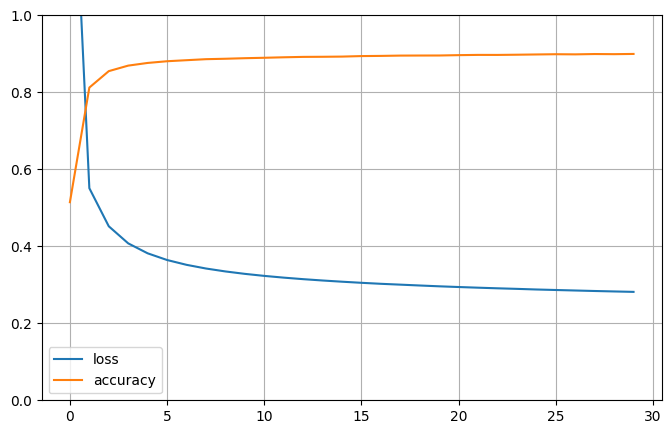

In [53]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [54]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 16s 5ms/step - loss: 0.2805 - accuracy: 0.9004
test loss, test acc: [0.280509889125824, 0.90038001537323]


In [55]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 15s 5ms/step
[[9183    5    0   96  164  523    0    0   28    1]
 [  45 7210  119    9 1141   38    7    0 1422    9]
 [   1   97 9080   18    0    1   16    0  501  286]
 [  77    0   23 9572    0    2    0    0  186  140]
 [ 156  886    0    2 8692  165    0    0   99    0]
 [ 569    6    0    7  185 9223    0    0   10    0]
 [   1    0    6    2    0    1 9957   33    0    0]
 [   0    0    0    1    1    0   38 9960    0    0]
 [  33 1255  583  219   62   20    1    0 7712  115]
 [   1    3  291  151    3    2    0    0  100 9449]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.92     10000
           1       0.76      0.72      0.74     10000
           2       0.90      0.91      0.90     10000
           3       0.95      0.96      0.95     10000
           4       0.85      0.87      0.86     10000
           5       0.92      0.92      0.92     10000
           6       0.99      1.0

Test Accuracy:0.90038


Text(0.5, 1.0, 'Accuracy:0.900')

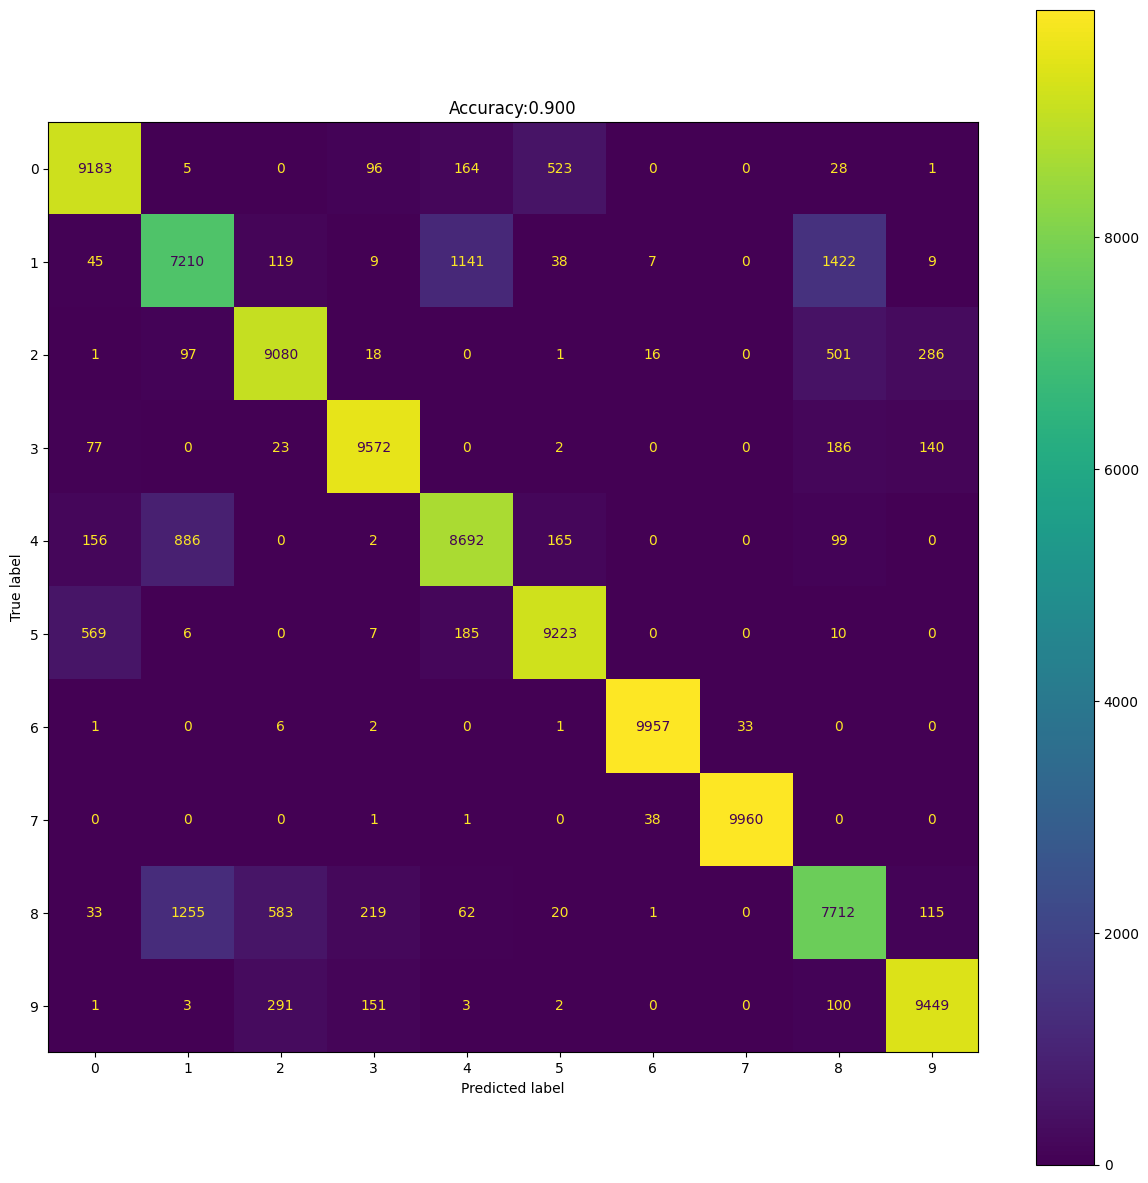

In [56]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_II model

Cross-model Validation without training

In [57]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_II_model.h5")
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [58]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 16s 5ms/step - loss: 8.4493 - accuracy: 0.0857
test loss, test acc: [8.449285507202148, 0.08566000312566757]


In [59]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 15s 5ms/step
[[   0  352    0    0    1  513    0    0  180 8954]
 [   0  246    0    1    1 9569    6    0    6  171]
 [   1    1    4    1    0 9973   18    0    1    1]
 [   0    0    0    0    0 1312 7599    0    0 1089]
 [   0 5883    0    1    3 2452    1    0   99 1561]
 [   0 1035    0    0    2 1292    0    0   44 7627]
 [   0   77    0 1827    1 6502    0 1592    0    1]
 [   0    2    0 2992    0    0    0 7005    0    1]
 [   0   28    0    1    1 8807  102    0    0 1061]
 [   0    0   26    3    0 8568 1386    0    1   16]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10000
           1       0.03      0.02      0.03     10000
           2       0.13      0.00      0.00     10000
           3       0.00      0.00      0.00     10000
           4       0.33      0.00      0.00     10000
           5       0.03      0.13      0.04     10000
           6       0.00      0.0

Test Accuracy:0.08566


Text(0.5, 1.0, 'Accuracy:0.086')

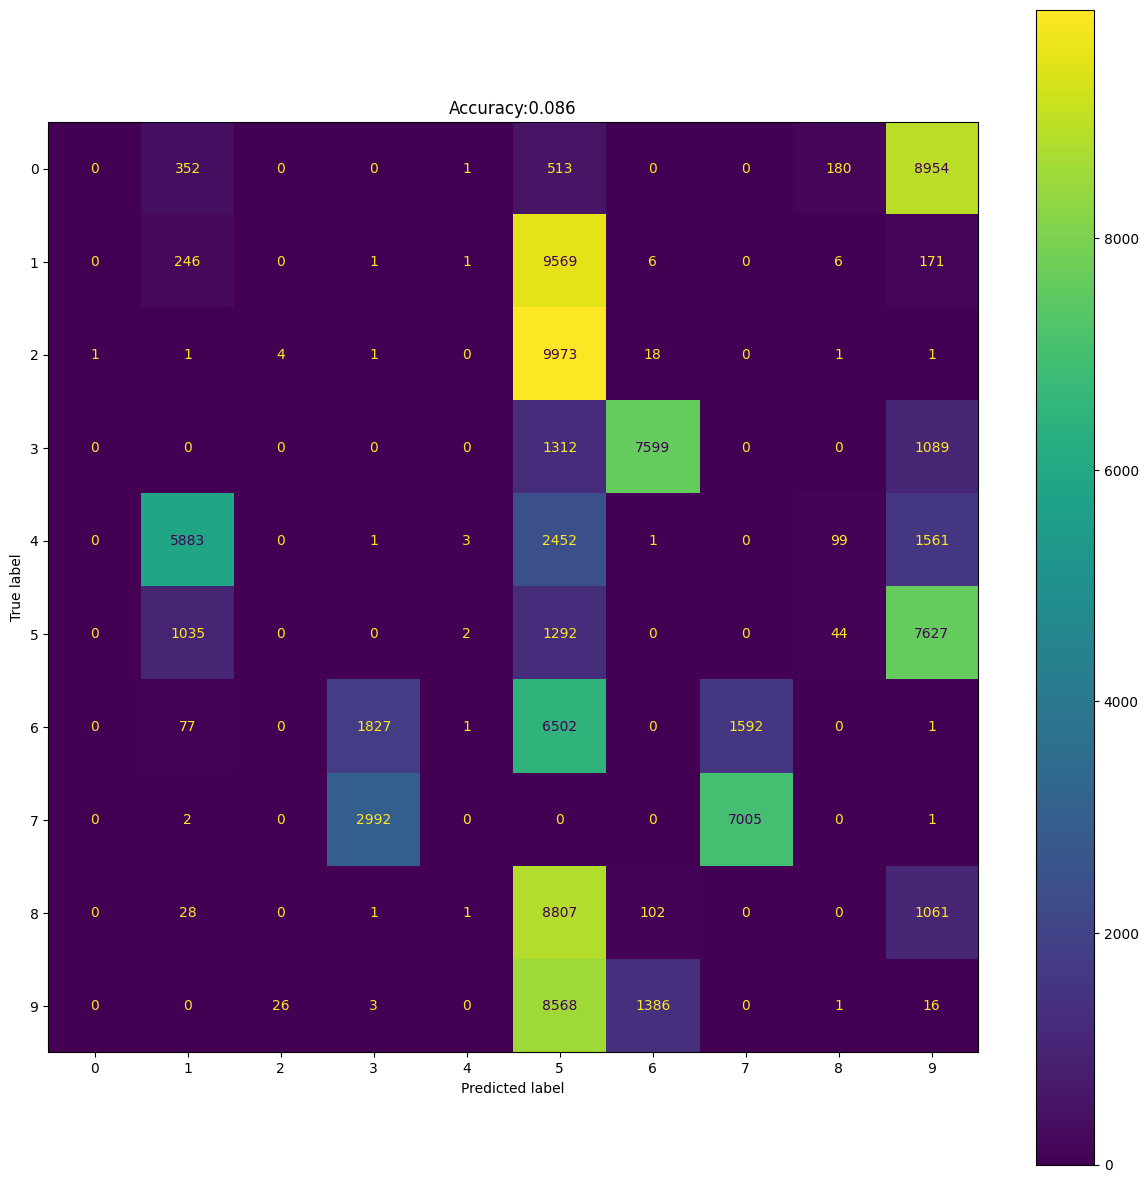

In [60]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [61]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [62]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 18s 5ms/step - loss: 1.4998 - accuracy: 0.5418
Epoch 2/30
3125/3125 [==============================] - 16s 5ms/step - loss: 0.7513 - accuracy: 0.7184
Epoch 3/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.6805 - accuracy: 0.7460
Epoch 4/30
3125/3125 [==============================] - 16s 5ms/step - loss: 0.6439 - accuracy: 0.7586
Epoch 5/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.6201 - accuracy: 0.7673
Epoch 6/30
3125/3125 [==============================] - 11s 3ms/step - loss: 0.6033 - accuracy: 0.7729
Epoch 7/30
3125/3125 [==============================] - 14s 4ms/step - loss: 0.5908 - accuracy: 0.7778
Epoch 8/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.5807 - accuracy: 0.7810
Epoch 9/30
3125/3125 [==============================] - 12s 4ms/step - loss: 0.5729 - accuracy: 0.7828
Epoch 10/30
3125/3125 [==============================] - 13s 4ms/step - l

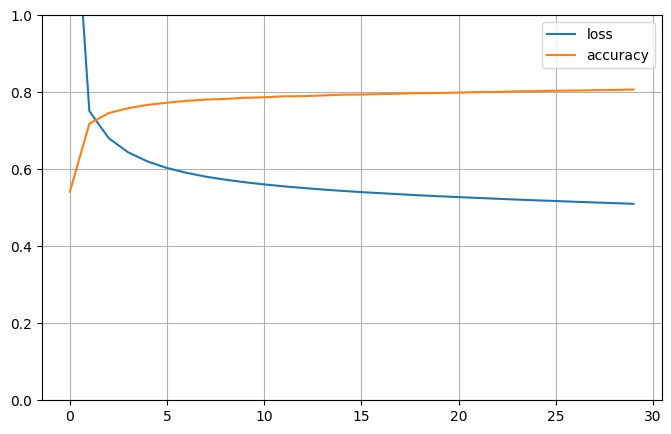

In [63]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [64]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 14s 4ms/step - loss: 0.5082 - accuracy: 0.8081
test loss, test acc: [0.5081804394721985, 0.8080899715423584]


In [65]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 15s 5ms/step
[[7835   56    0   21  220 1839    0    0   29    0]
 [  23 6805  579   23  678  226    9    0 1621   36]
 [   2  599 8142   30    1    0   13    0  315  898]
 [   9    6   33 9233    1    6    0    0  360  352]
 [ 154  741    0    2 7943  932    1    0  227    0]
 [1815  221    0   33  944 6772    0    0  215    0]
 [   2    0   23    1    1    0 9972    1    0    0]
 [   0    0    0    1    2    0    9 9988    0    0]
 [  17 1919  446  374  185  289    0    0 6257  513]
 [   4   36 1185  477    3    0    0    0  433 7862]]
              precision    recall  f1-score   support

           0       0.79      0.78      0.79     10000
           1       0.66      0.68      0.67     10000
           2       0.78      0.81      0.80     10000
           3       0.91      0.92      0.91     10000
           4       0.80      0.79      0.80     10000
           5       0.67      0.68      0.68     10000
           6       1.00      1.0

Test Accuracy:0.80809


Text(0.5, 1.0, 'Accuracy:0.808')

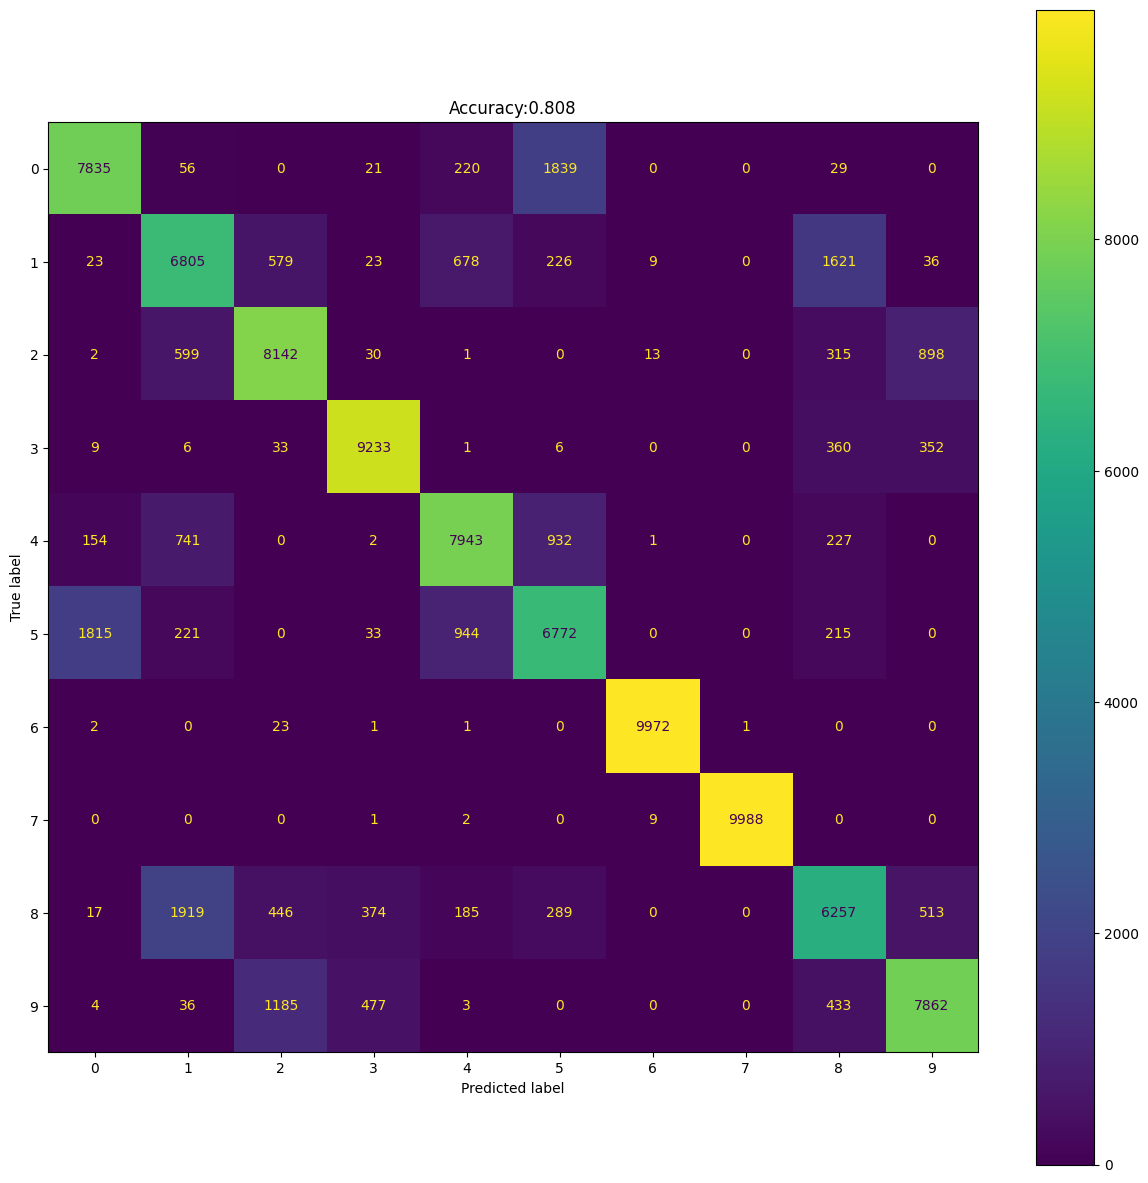

In [66]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_III model

In [67]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_III_model.h5")
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_13 (Dense)            (None, 800)               1120800   
                                                                 
 dense_14 (Dense)            (None, 500)               400500    
                                                                 
 dense_15 (Dense)            (None, 200)               100200    
                                                                 
 dense_16 (Dense)            (None, 100)               20100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [68]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 20s 6ms/step - loss: 22.3297 - accuracy: 0.1000
test loss, test acc: [22.329736709594727, 0.09995000064373016]


In [69]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 17s 5ms/step
[[    0     0     0     1     0     1     0     0  9998     0]
 [    0     0     0     0     0     1    14     0  9984     1]
 [    0     0     0     0     0     1     5     0  9993     1]
 [    0     0     0     0     0     0     0     0 10000     0]
 [    1     0     0     0     0     0    11     1  9986     1]
 [    0     0     0     0     0     1     4     1  9993     1]
 [    0     1     0     0     0     0     0     0  9997     2]
 [    0     0     0     0     0     0     2     1  9997     0]
 [    0     1     0     1     1     0     6     0  9991     0]
 [    0     0     0     0     0     0     3     0  9995     2]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10000
           1       0.00      0.00      0.00     10000
           2       0.00      0.00      0.00     10000
           3       0.00      0.00      0.00     10000
           4       0.00      0.00      0

Test Accuracy:0.09995


Text(0.5, 1.0, 'Accuracy:0.100')

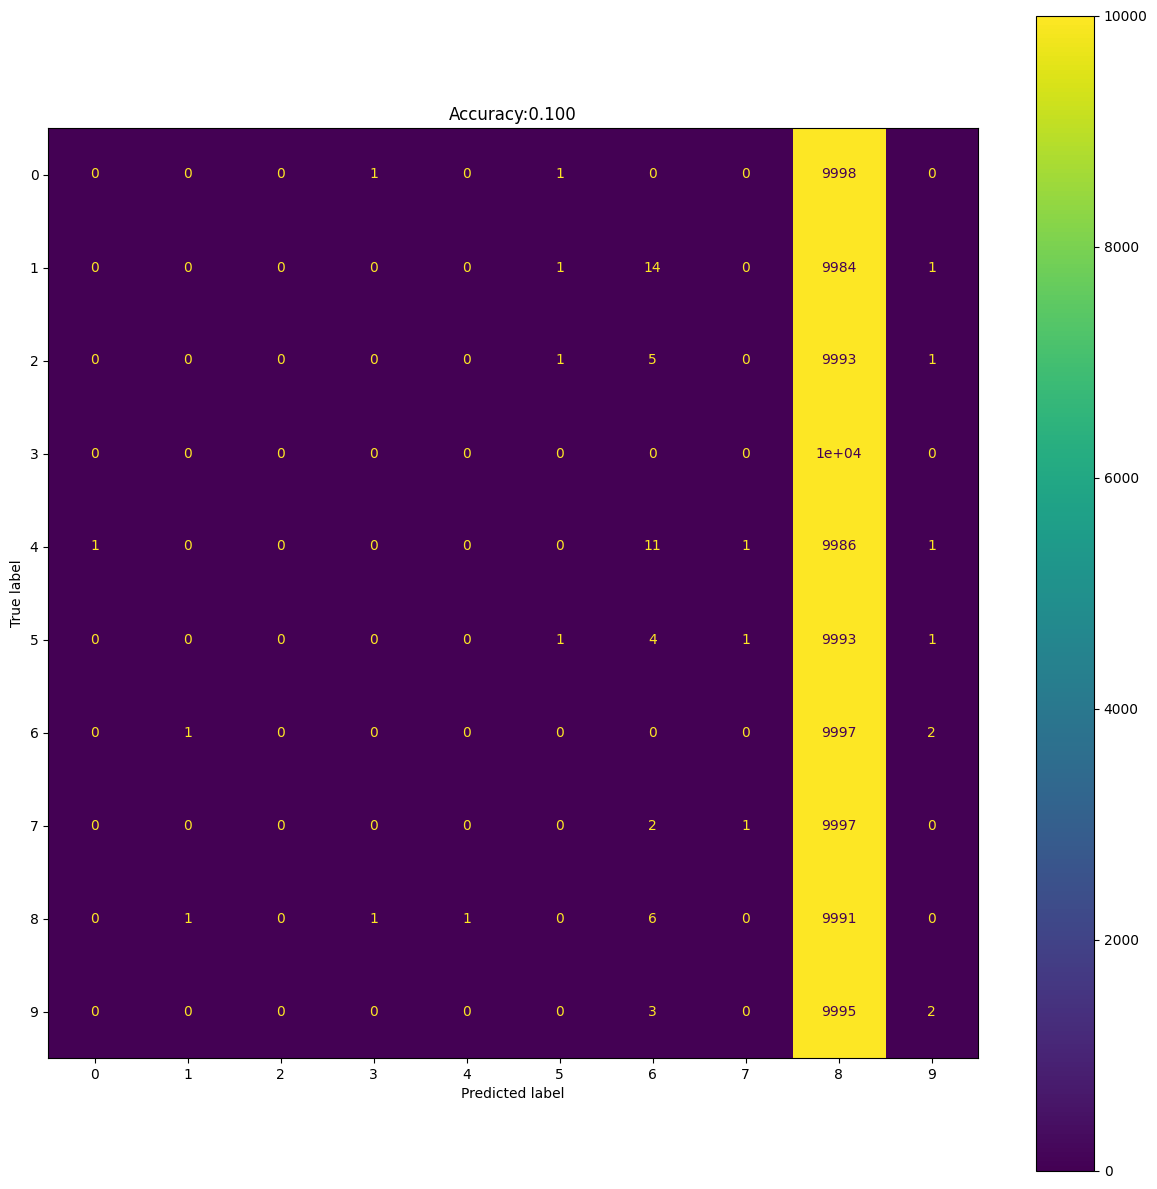

In [70]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [71]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_13 (Dense)            (None, 800)               1120800   
                                                                 
 dense_14 (Dense)            (None, 500)               400500    
                                                                 
 dense_15 (Dense)            (None, 200)               100200    
                                                                 
 dense_16 (Dense)            (None, 100)               20100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [73]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 16s 5ms/step - loss: 1.0449 - accuracy: 0.6704
Epoch 2/30
3125/3125 [==============================] - 23s 7ms/step - loss: 1.0386 - accuracy: 0.6702
Epoch 3/30
3125/3125 [==============================] - 18s 6ms/step - loss: 1.0322 - accuracy: 0.6728
Epoch 4/30
3125/3125 [==============================] - 15s 5ms/step - loss: 1.0264 - accuracy: 0.6722
Epoch 5/30
3125/3125 [==============================] - 16s 5ms/step - loss: 1.0206 - accuracy: 0.6741
Epoch 6/30
3125/3125 [==============================] - 15s 5ms/step - loss: 1.0152 - accuracy: 0.6759
Epoch 7/30
3125/3125 [==============================] - 14s 4ms/step - loss: 1.0100 - accuracy: 0.6775
Epoch 8/30
3125/3125 [==============================] - 14s 4ms/step - loss: 1.0052 - accuracy: 0.6781
Epoch 9/30
3125/3125 [==============================] - 21s 7ms/step - loss: 1.0001 - accuracy: 0.6788
Epoch 10/30
3125/3125 [==============================] - 19s 6ms/step - l

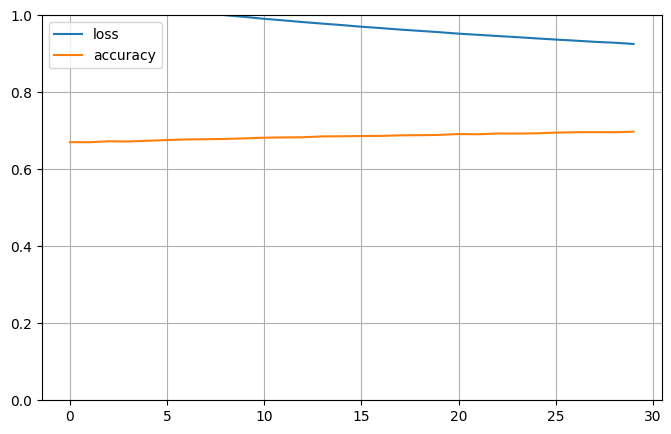

In [74]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [75]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 14s 4ms/step - loss: 0.9244 - accuracy: 0.6973
test loss, test acc: [0.9244137406349182, 0.6972799897193909]


In [76]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 18s 6ms/step
[[7328  201   42  112  542 1481    1    0  238   55]
 [ 389 4175  965  475 1607   98  321    2 1049  919]
 [   7  687 5065  243  244    7  246    9  128 3364]
 [  16  186  148 8227  174   29    1    0  478  741]
 [ 554  667  138  350 7564   17   95    0  328  287]
 [1617   60   17  104   36 7965    0    0  149   52]
 [   0   14  161    1   21    3 9161  603    0   36]
 [   0    0    2    1   10    1  361 9625    0    0]
 [ 439 1207  377 1180  834  353   17    0 3534 2059]
 [  15  378 1214  559  207   28   50    0  465 7084]]
              precision    recall  f1-score   support

           0       0.71      0.73      0.72     10000
           1       0.55      0.42      0.48     10000
           2       0.62      0.51      0.56     10000
           3       0.73      0.82      0.77     10000
           4       0.67      0.76      0.71     10000
           5       0.80      0.80      0.80     10000
           6       0.89      0.9

Test Accuracy:0.69728


Text(0.5, 1.0, 'Accuracy:0.697')

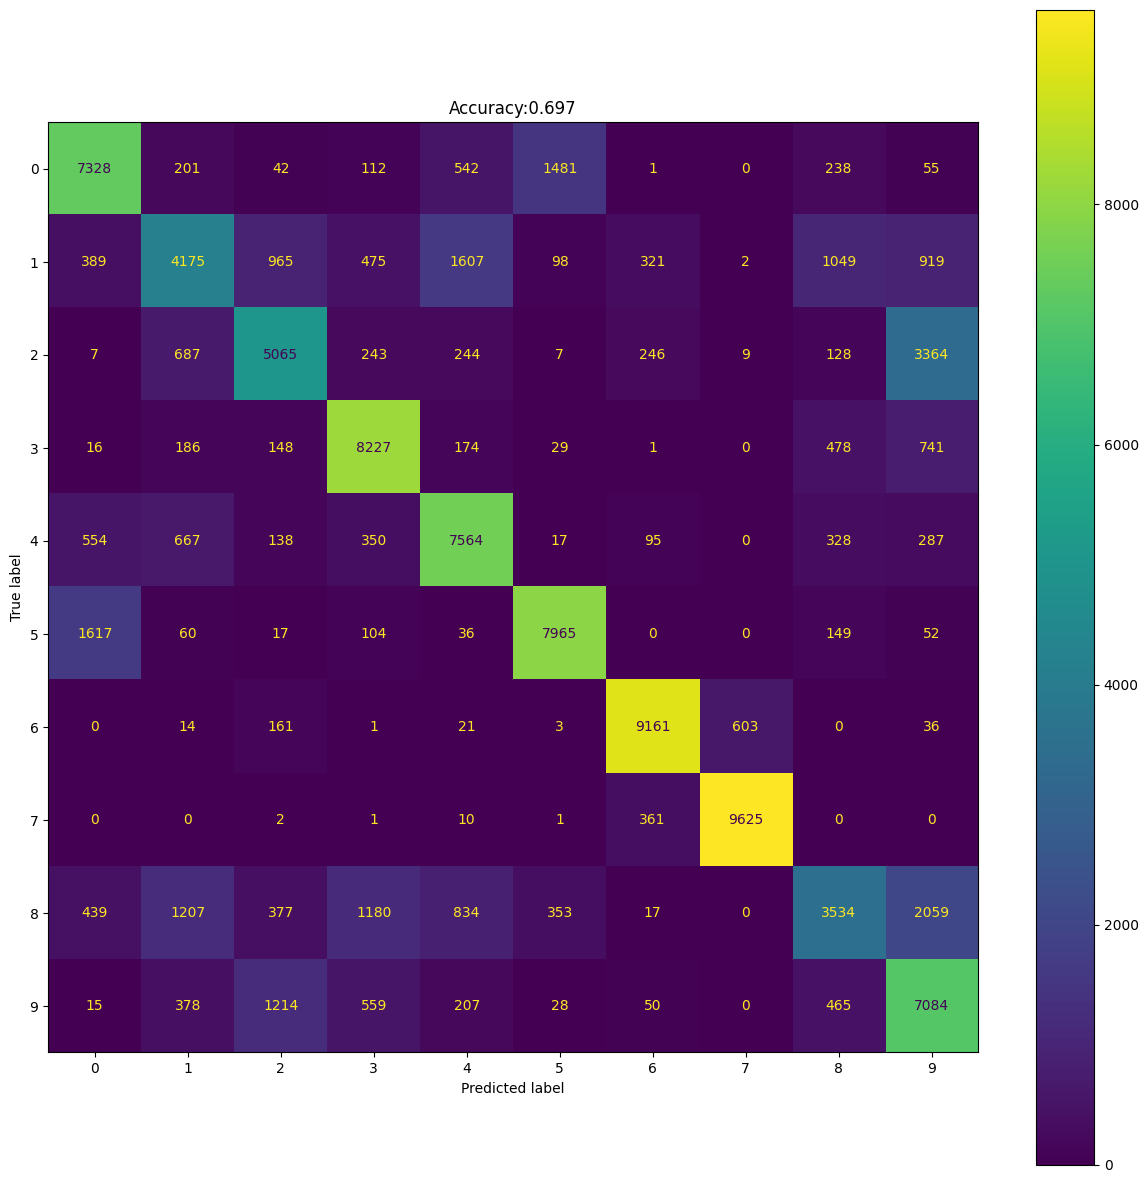

In [77]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')